<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data_multi_delta_(0__4)_n120_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_0-4'

In [4]:
os.listdir(base_path)

['data_multi_delta_0_n20-4.csv',
 'data_multi_delta_0_n30-4.csv',
 'data_multi_delta_0_n60-4.csv',
 'data_multi_delta_0_n120-4.csv',
 'data_multi_delta_0_n250-4.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_0_n120-4.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,49.881575,41.481536,98.216667,0.501317,200.081094,199.334818,0.746276
1,0.0,1.0,69.626185,57.539221,31.967629,-0.041285,169.091750,168.959530,0.132220
2,0.0,2.0,95.445545,89.394844,48.727885,-0.687608,242.880666,243.681410,-0.800744
3,0.0,3.0,96.816215,68.055104,51.428675,-0.602517,225.697477,226.198616,-0.501139
4,0.0,4.0,66.323705,87.527328,59.848340,-1.630764,222.068608,223.855610,-1.787002
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,56.027025,54.043092,59.890539,1.756315,181.716970,180.060006,1.656964
119996,999.0,116.0,56.704686,36.770736,37.841936,-0.720345,140.597014,141.378373,-0.781359
119997,999.0,117.0,82.986776,89.919605,21.222004,-1.114094,203.014290,204.388303,-1.374012
119998,999.0,118.0,87.778967,93.206203,64.620645,0.554977,256.160793,255.747690,0.413103


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,49.881575,41.481536,98.216667,0.501317,200.081094,199.334818,0.746276
1,0.0,1.0,69.626185,57.539221,31.967629,-0.041285,169.091750,168.959530,0.132220
2,0.0,2.0,95.445545,89.394844,48.727885,-0.687608,242.880666,243.681410,-0.800744
3,0.0,3.0,96.816215,68.055104,51.428675,-0.602517,225.697477,226.198616,-0.501139
4,0.0,4.0,66.323705,87.527328,59.848340,-1.630764,222.068608,223.855610,-1.787002
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,56.027025,54.043092,59.890539,1.756315,181.716970,180.060006,1.656964
119996,999.0,116.0,56.704686,36.770736,37.841936,-0.720345,140.597014,141.378373,-0.781359
119997,999.0,117.0,82.986776,89.919605,21.222004,-1.114094,203.014290,204.388303,-1.374012
119998,999.0,118.0,87.778967,93.206203,64.620645,0.554977,256.160793,255.747690,0.413103


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    49.881575  41.481536  98.216667  ...  200.081094  199.334818  0.746276
      1.0    69.626185  57.539221  31.967629  ...  169.091750  168.959530  0.132220
      2.0    95.445545  89.394844  48.727885  ...  242.880666  243.681410 -0.800744
      3.0    96.816215  68.055104  51.428675  ...  225.697477  226.198616 -0.501139
      4.0    66.323705  87.527328  59.848340  ...  222.068608  223.855610 -1.787002
...                ...        ...        ...  ...         ...         ...       ...
999.0 115.0  56.027025  54.043092  59.890539  ...  181.716970  180.060006  1.656964
      116.0  56.704686  36.770736  37.841936  ...  140.597014  141.378373 -0.781359
      117.0  82.986776  89.919605  21.222004  ...  203.014290  204.388303 -1.374012
      118.0  87.778967  93.206203  64.620645  ...  256.160793  255.747690  0.413103
      119.0  42.287921  88.966250  88.607218  ...  230.757640  230.139328  0.618312

[120000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    49.881575  41.481536  98.216667  ...  200.081094  199.334818  0.746276
      1.0    69.626185  57.539221  31.967629  ...  169.091750  168.959530  0.132220
      2.0    95.445545  89.394844  48.727885  ...  242.880666  243.681410 -0.800744
      3.0    96.816215  68.055104  51.428675  ...  225.697477  226.198616 -0.501139
      4.0    66.323705  87.527328  59.848340  ...  222.068608  223.855610 -1.787002
...                ...        ...        ...  ...         ...         ...       ...
999.0 115.0  56.027025  54.043092  59.890539  ...  181.716970  180.060006  1.656964
      116.0  56.704686  36.770736  37.841936  ...  140.597014  141.378373 -0.781359
      117.0  82.986776  89.919605  21.222004  ...  203.014290  204.388303 -1.374012
      118.0  87.778967  93.206203  64.620645  ...  256.160793  255.747690  0.413103
      119.0  42.287921  88.966250  88.607218  ...  230.757640  230.139328  0.618312

[120000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,49.881575,41.481536,98.216667,0.501317,200.081094,199.334818,0.746276
1,0.0,1.0,69.626185,57.539221,31.967629,-0.041285,169.091750,168.959530,0.132220
2,0.0,2.0,95.445545,89.394844,48.727885,-0.687608,242.880666,243.681410,-0.800744
3,0.0,3.0,96.816215,68.055104,51.428675,-0.602517,225.697477,226.198616,-0.501139
4,0.0,4.0,66.323705,87.527328,59.848340,-1.630764,222.068608,223.855610,-1.787002
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,56.027025,54.043092,59.890539,1.756315,181.716970,180.060006,1.656964
119996,999.0,116.0,56.704686,36.770736,37.841936,-0.720345,140.597014,141.378373,-0.781359
119997,999.0,117.0,82.986776,89.919605,21.222004,-1.114094,203.014290,204.388303,-1.374012
119998,999.0,118.0,87.778967,93.206203,64.620645,0.554977,256.160793,255.747690,0.413103


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    49.881575  41.481536  98.216667  ...  200.081094  199.334818  0.746276
      1.0    69.626185  57.539221  31.967629  ...  169.091750  168.959530  0.132220
      2.0    95.445545  89.394844  48.727885  ...  242.880666  243.681410 -0.800744
      3.0    96.816215  68.055104  51.428675  ...  225.697477  226.198616 -0.501139
      4.0    66.323705  87.527328  59.848340  ...  222.068608  223.855610 -1.787002
...                ...        ...        ...  ...         ...         ...       ...
999.0 115.0  56.027025  54.043092  59.890539  ...  181.716970  180.060006  1.656964
      116.0  56.704686  36.770736  37.841936  ...  140.597014  141.378373 -0.781359
      117.0  82.986776  89.919605  21.222004  ...  203.014290  204.388303 -1.374012
      118.0  87.778967  93.206203  64.620645  ...  256.160793  255.747690  0.413103
      119.0  42.287921  88.966250  88.607218  ...  230.757640  230.139328  0.618312

[120000 rows x 7 columns]

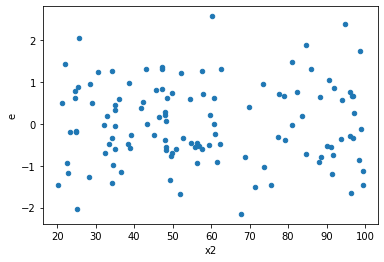

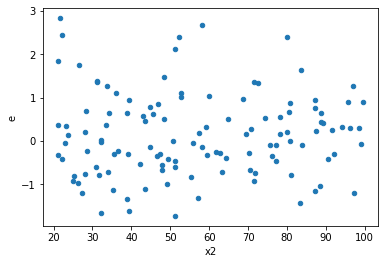

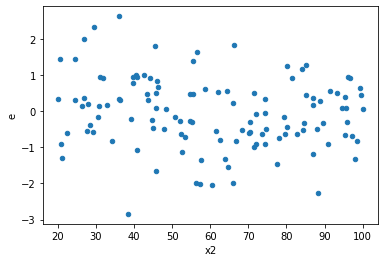

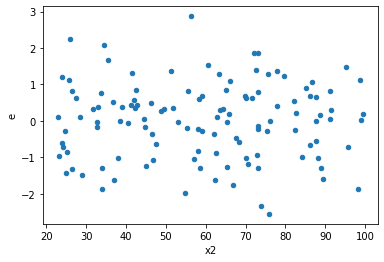

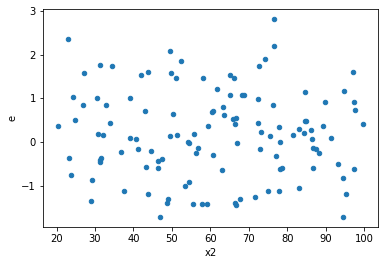

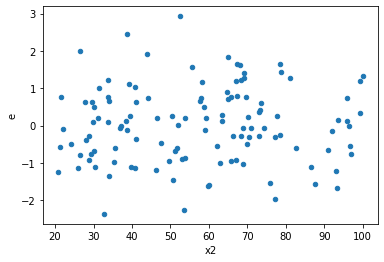

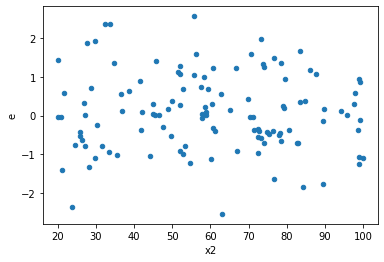

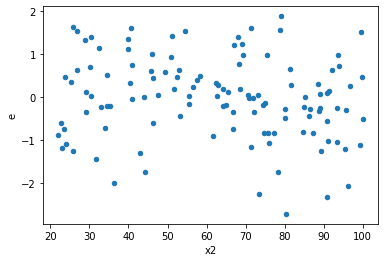

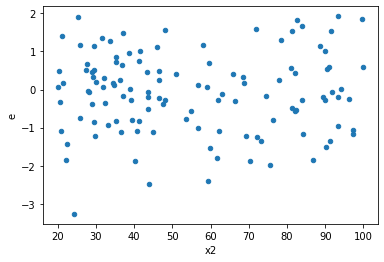

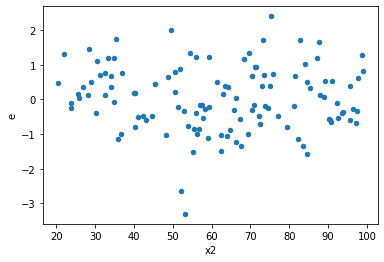

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x2
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,45.0,45.0,38.89682601362131,52.16932152650385,0.8643739114138068,1.15931825614453,1.3412230989807405,0.32831732958959803,0.835841335205201,0.16415866479479901,Reject005=1 : Homoscedasticity
2.0,45.0,45.0,38.6538475478403,44.80853105972761,0.8589743899520067,0.9957451346606137,1.1592256373513636,0.6222895327893805,0.6888552336053098,0.31114476639469024,Reject005=1 : Homoscedasticity
3.0,45.0,45.0,36.37593101531639,50.95197304121834,0.8083540225625865,1.1322660675826297,1.400705675952722,0.26213302695441465,0.8689334865227927,0.13106651347720732,Reject005=1 : Homoscedasticity
5.0,45.0,45.0,39.675521182676306,53.74658311832586,0.881678248503918,1.1943685137405746,1.3546534869917086,0.3122268646078712,0.8438865676960644,0.1561134323039356,Reject005=1 : Homoscedasticity
8.0,45.0,45.0,67.48927942863652,80.16327736215187,1.4997617650808115,1.781406163603375,1.1877927582100931,0.5661838359257132,0.7169080820371434,0.2830919179628566,Reject005=1 : Homoscedasticity
9.0,45.0,45.0,30.83464184928662,34.445135253073,0.6852142633174805,0.7654474500682888,1.1170921141693075,0.7119450226001123,0.6440274886999439,0.35597251130005614,Reject005=1 : Homoscedasticity
10.0,45.0,45.0,34.38259473816588,47.9504464987554,0.7640576608481306,1.06556547775012,1.3946139569719191,0.26832587447753076,0.8658370627612346,0.13416293723876538,Reject005=1 : Homoscedasticity
13.0,45.0,45.0,39.9337203708563,53.635477669675296,0.8874160082412511,1.1918995037705622,1.3431124666465728,0.32601160856297695,0.8369941957185115,0.16300580428148848,Reject005=1 : Homoscedasticity
18.0,45.0,45.0,43.90555874097471,52.72980229465539,0.9756790831327714,1.1717733843256755,1.2009823768726007,0.5415682078821016,0.7292158960589492,0.2707841039410508,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,45.0,45.0,38.89682601362131,52.16932152650385,0.8643739114138068,1.15931825614453,1.3412230989807405,0.32831732958959803,Reject005=1 : Homoscedasticity
1.0,45.0,45.0,62.38321394680402,48.823607399559606,1.3862936432623116,1.0849690533235468,0.7826401416443999,0.41423517467911125,Reject005=1 : Homoscedasticity
2.0,45.0,45.0,38.6538475478403,44.80853105972761,0.8589743899520067,0.9957451346606137,1.1592256373513636,0.6222895327893805,Reject005=1 : Homoscedasticity
3.0,45.0,45.0,36.37593101531639,50.95197304121834,0.8083540225625865,1.1322660675826297,1.400705675952722,0.26213302695441465,Reject005=1 : Homoscedasticity
4.0,45.0,45.0,45.31630383783691,40.09161532848276,1.0070289741741536,0.8909247850773947,0.8847062079897215,0.6829262319686038,Reject005=1 : Homoscedasticity
5.0,45.0,45.0,39.675521182676306,53.74658311832586,0.881678248503918,1.1943685137405746,1.3546534869917086,0.3122268646078712,Reject005=1 : Homoscedasticity
6.0,45.0,45.0,43.90715863618943,38.91324749785315,0.9757146363597651,0.8647388332856255,0.8862620289389401,0.6872292157176482,Reject005=1 : Homoscedasticity
7.0,45.0,45.0,47.01003750303989,34.42246049574092,1.0446675000675532,0.7649435665720205,0.73223639724846,0.2995303103850029,Reject005=1 : Homoscedasticity
8.0,45.0,45.0,67.48927942863652,80.16327736215187,1.4997617650808115,1.781406163603375,1.1877927582100931,0.5661838359257132,Reject005=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      948
Reject005=0 : Heteroscedasticity     52
Name: Result_test, dtype: int64